### 데이터 불러오기

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
import torch
import torch.nn as nn #neural network가 담긴 모듈
import torch.nn as optim #optimizer가 담긴 모듈
import torch.nn.init as init #neural network를 초기화하는 모듈
from torch.utils.data import DataLoader #data loader는 데이터를 batch size만큼 불러오는 역할

import torchvision 
import torchvision.datasets as dset #사진 등의 vision 데이터가 담긴 모듈
import torchvision.transforms as transforms #데이터를 자르고 반전시키고 tensor로 변환해주기등의 데이터 변환 함수를 불러오는 모듈
import numpy as np

import matplotlib.pyplot as plt

print(torch.__version__)

1.10.0+cu111




```
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
```



Normalize 작업은 텐서를 가져와 평균 및 표준 편차로 정규화합니다. transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) - mean : (sequence)형식으로 평균을 입력하며, 괄호 안에 들어가 있는 수의 개수가 채널의 수이다. - std : (sequence)형식으로 표준을 입력하며, 마찬가지로 괄호 안에 들어가 있는 수의 개수가 채널의 수이다.

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck') #정답 class 10가지 종류

Files already downloaded and verified
Files already downloaded and verified


### 데이터 일부 확인

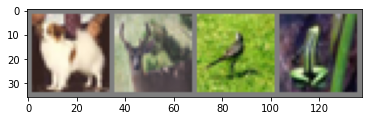

dog   deer  bird  frog 


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize 평균 0.5 표준편차 0.5로 정규화했으니 다시 돌이키기
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## 데이터 사이즈 확인

In [5]:
print(trainset)
image,label = trainset[0]
print(image.size(),label)
print(len(trainset))
print("_____________________________________________________________")
print(testset)
image,label = testset[0]
print(image.size(),label)
print(len(testset))

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
torch.Size([3, 32, 32]) 6
50000
_____________________________________________________________
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
torch.Size([3, 32, 32]) 3
10000


## 모델 정의
이후부터 과제 진행하시면 됩니다! 위는 수정 XX

'#####으로 표시된 부분에 작성하세요!


Conv(3,16,5)->ReLu->Conv(16,32,5)->ReLu->MaxPool2d(2,2)->Conv2d(32,64,5)->ReLu->MaxPool2d(2,2)->fc

In [6]:
import torch.nn as nn

In [7]:
# conv. layer, relu,  pooling layer, fc layer를 모두 1층 이상 사용하는 모델 Net()을 만들어주세요

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.layer = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels = 16, kernel_size = 5),            # [batch_size,3,32,32] -> [batch_size,16,28,28]
            nn.ReLU(),
            nn.Conv2d(in_channels=16,out_channels = 32, kernel_size = 5),            #[batch_size,16,28,28] -> [batch_size,32,24,24]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),                                  #[batch_size,32,24,24]->[batch_size,32,12,12]
            nn.Conv2d(in_channels=32,out_channels = 64, kernel_size = 5),            #[batch_size,32,12,12] -> [batch_size,64,8,8]
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)                                   #[batch_size,64,8,8]->[batch_size,64,4,4]
              )
        self.fc_layer= nn.Sequential(
            nn.Linear(64*4*4,100),  #[batch_size,64*4*4] -> [batch_size, 100]
            nn.ReLU(), 
            nn.Linear(100,10)    #[batch_size, 100] -> [batch_size, 10]
         )


    def forward(self, x):
        ##### 아래 작성 #####
        out = self.layer(x)
        out = out.view(out.size(0),-1) 

        
        out=self.fc_layer(out)
        return out


In [8]:
device= torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
print(device)
model=Net().to(device)

cpu


## 손실함수, optimizer 정의
필요한 모듈을 import하고 손실함수는 CrossEntropyLoss, optimizer는 SGD를 사용해주세요.

optimizer의 하이퍼파라미터는 lr=0.001, momentum=0.9로 통일합니다.

작성한 모델이 무거워 실행 시간이 오래 걸린다면 GPU를 활용하세요.

In [9]:
lr=0.001
momentum=0.9

In [10]:
criterion =  nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum)

## 모델 구조 확인
필요한 모듈을 import하여 모델의 구조를 확인하세요.

In [11]:
!pip install torchsummary

In [12]:
from torchsummary import summary
summary(model,(3,32,32), batch_size=4)  

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [4, 16, 28, 28]           1,216
              ReLU-2            [4, 16, 28, 28]               0
            Conv2d-3            [4, 32, 24, 24]          12,832
              ReLU-4            [4, 32, 24, 24]               0
         MaxPool2d-5            [4, 32, 12, 12]               0
            Conv2d-6              [4, 64, 8, 8]          51,264
              ReLU-7              [4, 64, 8, 8]               0
         MaxPool2d-8              [4, 64, 4, 4]               0
            Linear-9                   [4, 100]         102,500
             ReLU-10                   [4, 100]               0
           Linear-11                    [4, 10]           1,010
Total params: 168,822
Trainable params: 168,822
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/

## Train

In [13]:
# 모델을 학습

for epoch in range(5):

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data
        #inputs, labels = inputs.cuda(), labels.cuda() # add this line
        #### 아래 작성 #####
        optimizer.zero_grad()
        output=model.forward(inputs)
        loss=criterion(output,labels)
        loss.backward()
        optimizer.step()
        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.095
[1,  4000] loss: 1.759
[1,  6000] loss: 1.600
[1,  8000] loss: 1.494
[1, 10000] loss: 1.426
[1, 12000] loss: 1.365
[2,  2000] loss: 1.282
[2,  4000] loss: 1.232
[2,  6000] loss: 1.202
[2,  8000] loss: 1.170
[2, 10000] loss: 1.125
[2, 12000] loss: 1.078
[3,  2000] loss: 1.003
[3,  4000] loss: 0.993
[3,  6000] loss: 0.978
[3,  8000] loss: 0.968
[3, 10000] loss: 0.966
[3, 12000] loss: 0.951
[4,  2000] loss: 0.849
[4,  4000] loss: 0.829
[4,  6000] loss: 0.855
[4,  8000] loss: 0.853
[4, 10000] loss: 0.867
[4, 12000] loss: 0.870
[5,  2000] loss: 0.729
[5,  4000] loss: 0.757
[5,  6000] loss: 0.763
[5,  8000] loss: 0.770
[5, 10000] loss: 0.767
[5, 12000] loss: 0.775
Finished Training


## Test

In [15]:
dataiter = iter(testloader)
images, labels = dataiter.next()
#images, labels = images.cuda(), labels.cuda() # add this line

In [16]:
## 아래 코드 그대로 실행

correct = 0
total = 0
# 학습 중이 아니므로, 출력에 대한 변화도를 계산할 필요가 없습니다
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        #inputs, labels = inputs.cuda(), labels.cuda() # add this line

        # 신경망에 이미지를 통과시켜 출력을 계산합니다
        outputs = model(images)
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 9 %


## 클래스별 accuracy 비교

In [ ]:
## 아래 코드 그대로 실행

# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# 변화도는 여전히 필요하지 않습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        #inputs, labels = inputs.cuda(), labels.cuda() # add this line
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모읍니다
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')